<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/filtro1erorden_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En un filtro IIR, la frecuencia de corte es una característica importante, pero en el código que compartiste, no la definimos explícitamente porque los coeficientes (a0, a1, b0) ya determinan el comportamiento del filtro.

📌 ¿Por qué no mencionamos la frecuencia de corte?
En los filtros IIR de primer orden, como el que estás usando, la frecuencia de corte depende indirectamente de los coeficientes. A diferencia de los filtros FIR, donde se puede definir la frecuencia de corte directamente mediante la función de diseño, los filtros IIR tienen un comportamiento más dependiente de sus polos y ceros.

Para calcular la frecuencia de corte, tendríamos que analizar la respuesta en frecuencia de este sistema, lo cual se hace evaluando su función de transferencia, que en este caso sería:

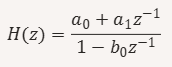

Este código grafica la respuesta en frecuencia del filtro, lo que nos permitirá visualizar la frecuencia de corte donde la magnitud empieza a decaer.

📌 ¿Cómo determinamos la frecuencia de corte?
La frecuencia de corte en un filtro IIR no se establece directamente, sino que resulta del comportamiento de sus coeficientes. La frecuencia de corte es el punto donde la magnitud cae aproximadamente a -3 dB, lo cual podemos estimar con el gráfico generado por freqz.

Si necesitas que la frecuencia de corte esté en un valor específico (por ejemplo, 50 Hz), podríamos ajustar los coeficientes o usar herramientas como scipy.signal.butter para diseñar un filtro que lo haga explícitamente.

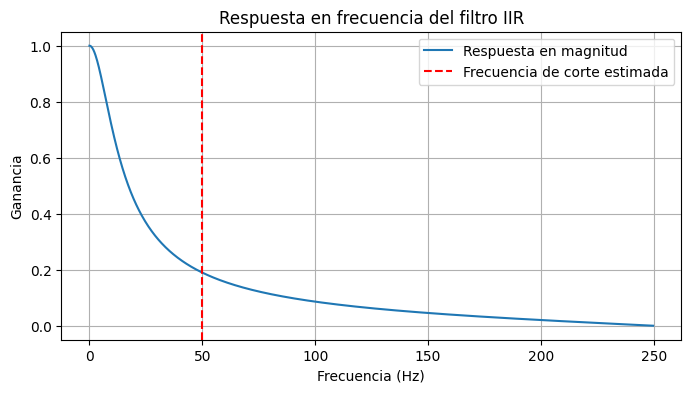

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Coeficientes del filtro
a = [0.05912, 0.05912]  # Numerador
b = [1, -0.8818]  # Denominador (realimentación)

# Calcular respuesta en frecuencia
# Esta línea usa la función freqz de scipy.signal, que calcula la respuesta en frecuencia de un filtro digital.
# Explicación de los parámetros:
# * a: Coeficientes del numerador del filtro (afectan la entrada).
# * b: Coeficientes del denominador del filtro (afectan la realimentación).
# * worN=1024: Número de puntos en los cuales se evalúa la respuesta en frecuencia.
# Salida de freqz
# * w: Frecuencias normalizadas en radianes por muestra.
# * h: Valores de la respuesta en frecuencia (magnitud y fase) en esas frecuencias.
w, h = freqz(a, b, worN=1024)

# Convertir a frecuencia en Hz
# Esta línea convierte las frecuencias de w (que están en radianes/muestra) a frecuencia en Hz.
# Explicación del cálculo:
# 1. w / (2 * np.pi): Convierte radianes/muestra a ciclos por muestra.
# 2. * 500: Convierte la frecuencia a Hz, asumiendo una frecuencia de muestreo de 500 Hz.
frecuencia_hz = w / (2 * np.pi) * 500  # Asumiendo una frecuencia de muestreo de 500 Hz

# Graficar respuesta en frecuencia
plt.figure(figsize=(8, 4))
plt.plot(frecuencia_hz, abs(h), label="Respuesta en magnitud")
plt.axvline(50, color="red", linestyle="--", label="Frecuencia de corte estimada")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Ganancia")
plt.title("Respuesta en frecuencia del filtro IIR")
plt.legend()
plt.grid()
plt.show()